In [15]:
# 导入所需的库
import re
from snownlp import sentiment
import numpy as np
import pandas as pd
import pymysql
from snownlp import SnowNLP
from snownlp import sentiment
from snownlp.sentiment import Sentiment
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('df_final.csv')

In [125]:
df_new = df[(df.content != '转发微博')&(df.content != 'repost')&(df.content != '')]

In [126]:
data = df_new.dropna()

In [129]:
data.reset_index(drop=True, inplace=True)

In [131]:
content = data['content']

In [139]:
data['sentiment'] = None

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
for i in range(data.shape[0]):
    comm = content[i]
    text = re.sub(r'(?:回复)?(?://)?@[\w\u2E80-\u9FFF]+:?|\[\w+\]', '', comm)
    # replase @user / reply
    r='[’！？：；【】，《》!"#$%&\'()（）“”…*+,-./:;<=>?@[\\]^_`{|}~]+'
    text = re.sub(r, '', text)
    # replace punctuations
    if text:
        s = SnowNLP(text)
        data['sentiment'][i] = s.sentiments
    # if after cleaning, the text is None, this repost will be assigned 0.5 sentiment score(neutral)
    else:
        data['sentiment'][i] = 0.5

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [149]:
data.head()

,user_id,created_at,content,like_num,repost_num,comment_num,sentiment
0,1681872675,2020-01-20 08:10,发现满屏都是关于新冠肺炎在全国各地传播的新闻，虽可控可防，但还是觉得可怕，不禁想起09年非典...,0,0,0,1
1,1306052985,2020-01-20 08:21,三条通报的时间点好一致//首发症状大多为发热、咳嗽、胸闷、呼吸困难，这新冠肺炎还挺厉害的……,0,0,0,0.702556
2,2218332387,2020-01-20 09:08,关于最近很猖狂的新冠型肺炎病毒 我们紧急召开了第二届家庭会议 与会人员：我、谢胖子 会议主题...,0,1,3,0.635958
3,2167644005,2020-01-20 13:49,有过上海世博会的经历，各种排队不是个事儿。有过非典型肺炎的经验，武汉新冠也不会恐慌。,0,0,0,0.00317119
4,7339096067,2020-01-20 18:34,#星座[超话]# 仔细想想，自打1.12土冥合相之后就没什么好消息啊…叹气 更不用说这两天突...,4,0,7,0.944389


In [150]:
import seaborn as sns

In [152]:
senti = data.sentiment.tolist()

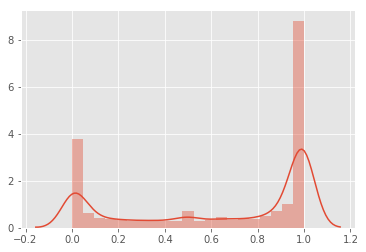

In [154]:
# plot sentiment distribution
ax = sns.distplot(senti)

We can see that most comments are classified as positive ones.